Houston is the headquarters and the intellectual capital for virtually every segment of the energy industry including exploration, production, transmission, marketing, supply, and technology. The economy of this city was tightly linked to the international oil price. Due to the volatility of oil market in the last ten years, the city was putting its efforts to dilute the impacts from oil industry and the fluctuation of crude oil price.

The Goal of this project is to study the correlation between Crude Oil price and the employment number (positions) of different sectors of Houston in the last ten year, to see if the economy of this city can be independent from international oil market. Also will try to predict the employment future of different sectors in Houston by the historical employment statistics time series data.

The historical data of crude oil price in this proposal (here we only use WTI since oil prices are highly correlated for different standards) was extracted from the homepage of U.S. Energy Information Administration (EIA) https://www.eia.gov with daily WTI oil price recorded from 1986 January to 2021 October.

The employment data of Houston was extracted from the website of US Bureau of Labor https://www.bls.gov/eag/eag.tx_houston_msa.htm. The data extracted from this website was sampled by month from 2011 January to 2021 October for 11 different categories/sectors.


In [18]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [124]:
#Import hostorical WTI Oil Price

wti_raw = pd.read_csv('WTI_History.csv')
wti_raw['Date'] = pd.to_datetime(wti_raw['Date'])
wti_raw = wti_raw.rename(columns={"Cushing, OK WTI Spot Price FOB (Dollars per Barrel)":"price","Date":"date"}).dropna()

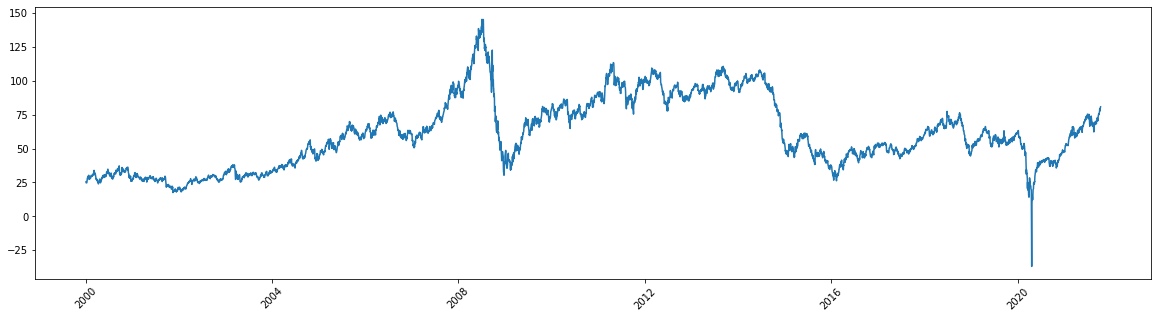

In [131]:
#Initial QC: plot oil price since 2000 January.

plt.figure(figsize=(20,5))
plt.xticks(rotation = 45)
plt.plot(wti_raw[wti_raw['date']> '2000-01-01']['date'],wti_raw[wti_raw['date']> '2000-01-01']['price'])

In [145]:
#Import employement data. The Units of data in one thousand

employ_totalnonfarm_raw =  pd.read_csv('employ_totalnonfarm.csv')
employ_minlog_raw =  pd.read_csv('employ_mine_log.csv')
employ_trade_raw =  pd.read_csv('employ_trade_trans_util.csv')
employ_constr_raw =  pd.read_csv('employ_construction.csv')
employ_manuf_raw =  pd.read_csv('employ_manuf.csv')
employ_eduhea_raw =  pd.read_csv('employ_edu_health.csv')
employ_fin_raw =  pd.read_csv('employ_finance.csv')
employ_leihop_raw =  pd.read_csv('employ_lei_hosp.csv')
employ_info_raw =  pd.read_csv('employ_info.csv')
employ_gov_raw =  pd.read_csv('employ_gov.csv')
employ_prof_raw =  pd.read_csv('employ_prof_bussiness.csv')

In [151]:
# Raw employment data was organized by year and month in different axis, need to 'melt' the data into single column time series

d1= {'totalnonfarm':employ_totalnonfarm_raw.set_index('Year').T.melt().value,
'mine_log':employ_minlog_raw.set_index('Year').T.melt().value,
'trade_trans_util':employ_trade_raw.set_index('Year').T.melt().value,
'construction':employ_constr_raw.set_index('Year').T.melt().value,
'manuf':employ_manuf_raw.set_index('Year').T.melt().value,
'edu_health':employ_eduhea_raw.set_index('Year').T.melt().value,
'finance':employ_fin_raw.set_index('Year').T.melt().value,
'lei_hosp':employ_leihop_raw.set_index('Year').T.melt().value, 
'info':employ_info_raw.set_index('Year').T.melt().value, 
'gov':employ_gov_raw.set_index('Year').T.melt().value, 
'prof_bussiness':employ_prof_raw.set_index('Year').T.melt().value}

Naming for the data

'price': Oil Price
'totalnonfarm': Total Non Farm (Nearly the sum of all the data, since some small subsector was ignored from the data)

 'mine_log': Mining and Logging
 'manuf': Manufacturing
 'info': Information
 'lei_hosp': Lesiure and Hospitality
 'gov': Government
 'prof_bussiness': Professional and Bussiness Services
 'trade_trans_util': Trade, Transportation and Utilities
 'construction': Constructions
 'finance': Financial Activities
 'edu_health': Education and Health

In [191]:
Data_employ = pd.DataFrame(d1)

In [192]:
#Import the corresponding dates for employment data

employ_dates =  pd.read_csv('employ_dates.csv')
Data_employ['date'] = employ_dates
Data_employ['date'] = pd.to_datetime(Data_employ['date'])
Data_employ=Data_employ.set_index('date')
Data_employ = Data_employ.dropna()

In [197]:
# Data QC: The unit is one thousand positions.

Data_employ

,totalnonfarm,mine_log,trade_trans_util,construction,manuf,edu_health,finance,lei_hosp,info,gov,prof_bussiness
date,,,,,,,,,,,
2011-01-28,2566.8,85.4,527.8,165.9,218.0,309.8,138.0,230.5,32.5,386.3,380.8
2011-02-28,2582.7,86.4,525.5,169.6,219.4,311.0,138.2,232.8,32.4,389.7,385.2
2011-03-28,2605.0,86.9,529.7,170.8,220.9,312.3,138.7,240.5,32.2,390.3,390.1
2011-04-28,2625.8,87.9,533.7,170.9,222.3,314.1,138.6,243.9,32.2,390.8,396.5
2011-05-28,2631.8,88.2,534.7,170.7,223.0,315.1,138.9,247.7,32.4,388.3,396.9
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-28,3018.0,69.5,623.1,207.5,207.7,396.8,162.5,305.2,28.5,416.8,490.8
2021-05-28,3037.8,69.9,626.4,206.1,207.0,401.5,164.0,312.8,28.6,417.2,493.1
2021-06-28,3047.3,68.9,631.8,204.2,207.2,400.5,163.2,326.6,28.8,411.1,493.7


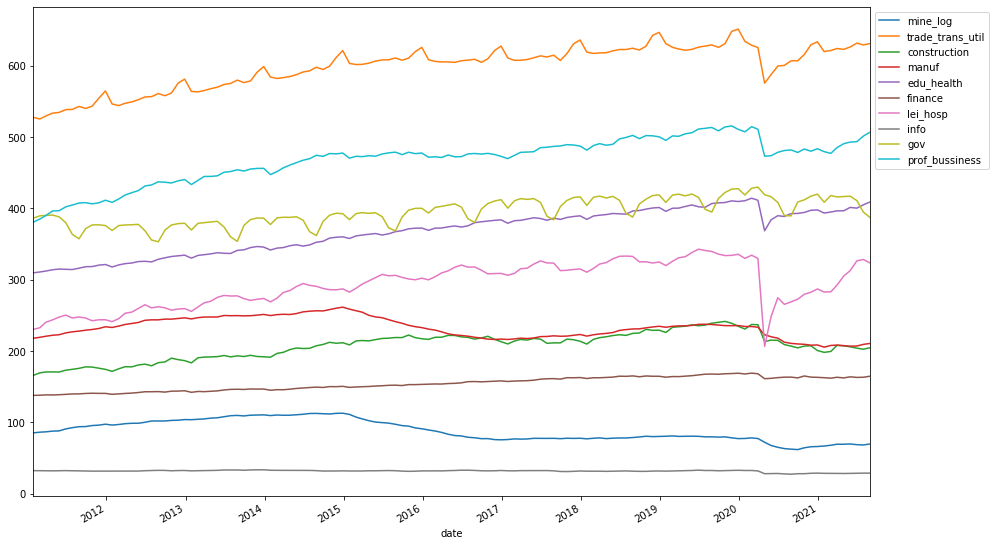

In [218]:
# Plot the time evolution of employment number for different sectors in Houston

ax = Data_employ.loc[:, Data_employ.columns!='totalnonfarm'].plot(figsize=(15,10))
ax = ax.legend(bbox_to_anchor=(1.0, 1.0))

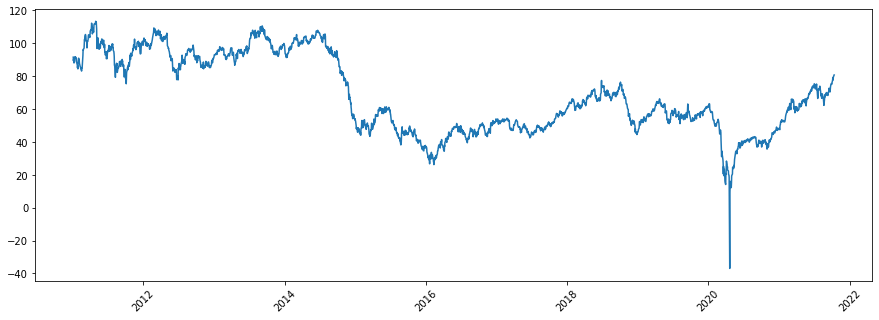

In [217]:
#Replot the WTI time series by truncating the date from 2011 to match the employment data

plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
plt.plot(wti_raw[wti_raw['date']> '2011-01-01']['date'],wti_raw[wti_raw['date']> '2011-01-01']['price'])

In [220]:
# Resample the employment data by month

Data_employ_target = Data_employ.resample('BM').mean()
Data_employ_target

,totalnonfarm,mine_log,trade_trans_util,construction,manuf,edu_health,finance,lei_hosp,info,gov,prof_bussiness
date,,,,,,,,,,,
2011-01-31,2566.8,85.4,527.8,165.9,218.0,309.8,138.0,230.5,32.5,386.3,380.8
2011-02-28,2582.7,86.4,525.5,169.6,219.4,311.0,138.2,232.8,32.4,389.7,385.2
2011-03-31,2605.0,86.9,529.7,170.8,220.9,312.3,138.7,240.5,32.2,390.3,390.1
2011-04-29,2625.8,87.9,533.7,170.9,222.3,314.1,138.6,243.9,32.2,390.8,396.5
2011-05-31,2631.8,88.2,534.7,170.7,223.0,315.1,138.9,247.7,32.4,388.3,396.9
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,3018.0,69.5,623.1,207.5,207.7,396.8,162.5,305.2,28.5,416.8,490.8
2021-05-31,3037.8,69.9,626.4,206.1,207.0,401.5,164.0,312.8,28.6,417.2,493.1
2021-06-30,3047.3,68.9,631.8,204.2,207.2,400.5,163.2,326.6,28.8,411.1,493.7


In [227]:
# Truncate and resample the WTI data by month to match the employment data

wti_target = wti_raw[wti_raw['date']> '2011-01-01'][wti_raw['date']< '2021-09-01'].set_index('date').resample('1M').mean()

C:\Users\pzhen\Machine_Learning\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [228]:
wti_target

,price
date,
2011-01-31,89.170500
2011-02-28,88.578421
2011-03-31,102.856522
2011-04-30,109.532500
2011-05-31,100.900476
...,...
2021-04-30,61.716667
2021-05-31,65.169500
2021-06-30,71.378182


In [231]:
# Join the WTI and employment data just to prepare the whole series correlation QC

merged = pd.merge_asof(wti_target, Data_employ_target, left_index=True, right_index=True, direction='nearest')

In [232]:
merged

,price,totalnonfarm,mine_log,trade_trans_util,construction,manuf,edu_health,finance,lei_hosp,info,gov,prof_bussiness
date,,,,,,,,,,,,
2011-01-31,89.170500,2566.8,85.4,527.8,165.9,218.0,309.8,138.0,230.5,32.5,386.3,380.8
2011-02-28,88.578421,2582.7,86.4,525.5,169.6,219.4,311.0,138.2,232.8,32.4,389.7,385.2
2011-03-31,102.856522,2605.0,86.9,529.7,170.8,220.9,312.3,138.7,240.5,32.2,390.3,390.1
2011-04-30,109.532500,2625.8,87.9,533.7,170.9,222.3,314.1,138.6,243.9,32.2,390.8,396.5
2011-05-31,100.900476,2631.8,88.2,534.7,170.7,223.0,315.1,138.9,247.7,32.4,388.3,396.9
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,61.716667,3018.0,69.5,623.1,207.5,207.7,396.8,162.5,305.2,28.5,416.8,490.8
2021-05-31,65.169500,3037.8,69.9,626.4,206.1,207.0,401.5,164.0,312.8,28.6,417.2,493.1
2021-06-30,71.378182,3047.3,68.9,631.8,204.2,207.2,400.5,163.2,326.6,28.8,411.1,493.7


In [233]:
#QC the correlation table with the whole series

merged.corr()

,price,totalnonfarm,mine_log,trade_trans_util,construction,manuf,edu_health,finance,lei_hosp,info,gov,prof_bussiness
price,1.000000,-0.636836,0.679451,-0.686917,-0.720882,0.496530,-0.748014,-0.730710,-0.532354,0.387984,-0.660487,-0.660977
totalnonfarm,-0.636836,1.000000,-0.433400,0.962680,0.958601,-0.109065,0.932112,0.897122,0.931319,-0.066325,0.723260,0.979820
mine_log,0.679451,-0.433400,1.000000,-0.511770,-0.434581,0.906067,-0.711420,-0.754315,-0.422540,0.621096,-0.709235,-0.477783
trade_trans_util,-0.686917,0.962680,-0.511770,1.000000,0.890614,-0.234903,0.943805,0.905098,0.875353,-0.212604,0.722289,0.958079
construction,-0.720882,0.958601,-0.434581,0.890614,1.000000,-0.093476,0.890299,0.863176,0.879379,-0.024652,0.710293,0.934394
manuf,0.496530,-0.109065,0.906067,-0.234903,-0.093476,1.000000,-0.425037,-0.458612,-0.164637,0.623063,-0.491834,-0.153569
edu_health,-0.748014,0.932112,-0.711420,0.943805,0.890299,-0.425037,1.000000,0.986539,0.848990,-0.356001,0.811589,0.950728
finance,-0.730710,0.897122,-0.754315,0.905098,0.863176,-0.458612,0.986539,1.000000,0.808073,-0.381628,0.810762,0.925473
lei_hosp,-0.532354,0.931319,-0.422540,0.875353,0.879379,-0.164637,0.848990,0.808073,1.000000,0.100697,0.611605,0.881178
info,0.387984,-0.066325,0.621096,-0.212604,-0.024652,0.623063,-0.356001,-0.381628,0.100697,1.000000,-0.327635,-0.200380


In [281]:
# Sort the correlation table in the descending order of values of the correlation with WTI oil price

corr_sort = merged.corr()[merged.corr().sort_values('price',ascending = False).index].sort_values('price',ascending = False)

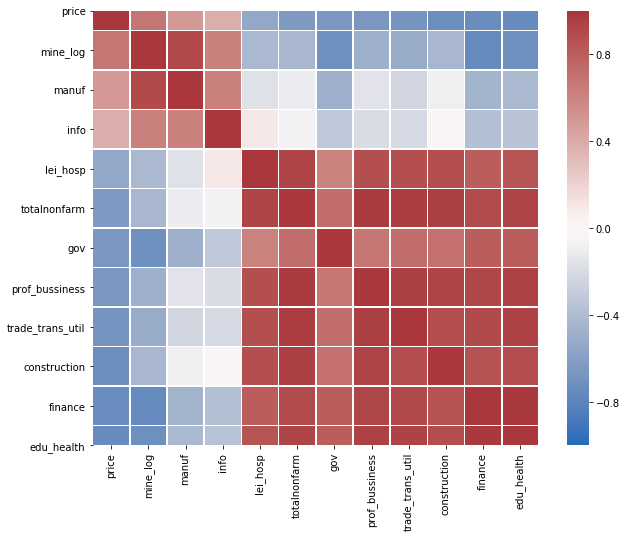

In [280]:
# Heatmap QC for the correlation talbe. Not only QC the correlation with oil price 
#but also the correlation of numbers between sectors

import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr_sort,  linewidths=.5, cmap = 'vlag' , vmin=-1, vmax=1, ax=ax)

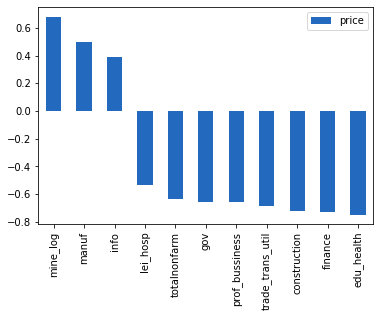

In [563]:
#Slice out the correction with WTI oil price only
# Some observation Here:
#    By looking at the whole time series corrletion, seems Mine/logging, manufacturing and information sectors 
#    are highly positively correlaed to WTI oil price while the other sectors including the total non farm employment
#    in Houston are doing the opposite, which implies the dependance of oil price is low now for Houston enconomy?


corr_sort.loc[corr_sort.columns != 'price'].plot.bar(y = 'price', colormap = my_cmap)

In [ ]:
# Another QC to generate every 3 year correlations with sliding window to QC the changes of correlation by time

corr_3y_all = []
for yr in range(2012,2020):
    d3y = merged[merged.index.year >= yr-1]
    d3y = d3y[d3y.index.year <= yr + 1]
    corr_3y = d3y[merged.corr().sort_values('price',ascending = False).index].corr().to_numpy()
    print(corr_3y)
    corr_3y_all.append(corr_3y)

In [483]:
N = len(corr_3y_all)
import plotly.graph_objs as go

In [566]:
# Generate Heatmap Animation for the 3 year correlation to see its evolution with time in the last 10 years

axis_value =['price','mine_log', 'manuf', 'info', 'lei_hosp','totalnonfarm', 'gov','prof_bussiness','trade_trans_util','construction','finance','edu_health']

fig = go.Figure(
    data=[go.Heatmap(z=corr_3y_all[0].T,zmin = -1, zmax =1 ,colorscale= [[0,'rgb(255,0,0)'],[0,'rgb(0,0,0)'],[0,'rgb(0,0,255)']],x = axis_value,y = axis_value,)],
    layout=go.Layout(
        title="3 year correlation: Year 2011 ~ 2012",
        title_x=0.5,
        width=600,
        height=600,
        yaxis=dict(autorange='reversed'),
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                          method="animate",
                          args=[None]),
                    dict(label="Pause",
                         method="animate",
                         args=[None,
                               {"frame": {"duration": 0, "redraw": False},
                                "mode": "immediate",
                                "transition": {"duration": 0}}],
                         )])]
    ),
    frames=[go.Frame(data=[go.Heatmap(z=corr_3y_all[i].T,zmin = -1, zmax =1)],
                     layout=go.Layout(title_text=f"3 year correlation: Year {2011+i+1} ~ {2011+i+3}")) 
            for i in range(0, N)]
)

fig.show()